#### 데이터 명세
- h12_g3 : 성별(1 : 남자, 2 : 여자, 9 : 모름/무응답)
- h12_g4 : 태어난 년도(1900 ~ 2014, 9999 : 모름/무응답)
- h12_g10 : 혼인상태(0 : 미해당, 1 : 유배우, 2 : 사별, 3 : 이혼, 4 : 별거, 5 : 미혼(18세 이상, 미혼모 포함), 6 : 기타, 9 : 모름/무응답
- h12_g11 : 종교(1 : 있음, 2 : 없음, 9 : 모름/무응답)
- h12_eco9 : 직종(직종코드표, 9999 : 모름/무응답)
- p1202_8aq1 : 일을 한 달의 월 평균 임금(1 ~ 9998, 만원 단위, 9999 : 모름/무응답)
- h12_reg7 : 7개 권역별 지역 부분(1 : 서울, 2 : 수도권(인천/경기), 3 : 부산/경남/울산, 4 : 대구/경북, 5 : 대전/충남, 6 : 강원/충북, 7 : 광주/전남/전북/제주도

#### 분석할 내용
- 조사 대상에서 남녀 성별 비를 파악한다.
- 성별에 따른 평균 월급 차이 분석
- 나이에 따른 평균 임금의 변화
- 종교 유무에 따른 이혼비율

In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# KFold (교차 검증을 사용하기 위해)
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가 함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRFRegressor

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'   # 윈도우용
# plt.rcParams['font.family'] = 'AppleGothic'   # 맥용
plt.rcParams['font.size'] = 16                  # 폰트 크기
plt.rcParams['figure.figsize'] = 20,10          # 그래프 크기
plt.rcParams['axes.unicode_minus'] = False     # - 기호 깨짐 방지


# 경고 메시지가 안나오게 
import warnings
warnings.filterwarnings('ignore')

### 데이터 불러오기

In [2]:
df = pd.read_excel('../dataset/dataset2017.xlsx')
df

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [12]:
# df['h12_g3 ','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']
df1 = df[['h12_g3','h12_g4','h12_g10','h12_g11','h12_eco9','p1202_8aq1','h12_reg7']]
df1.columns=['성별','태어난 년도','혼인상태','종교','직종','월평균임금','지역']

In [13]:
df1

,성별,태어난 년도,혼인상태,종교,직종,월평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


### 조사 대상에서 남녀 성별 비를 파악한다.
- 1:남자, 2:여자, 9:무응답

In [14]:
# 남자 인원수
man = df1[df1['성별'] == 1]
man_count = df1[df1['성별'] == 1]['성별'].count()

# 여자 인원수
woman = df1[df1['성별'] == 2]
woman_count = df1[df1['성별'] == 2]['성별'].count()

# 무응답 수
count = df1[df1['성별'] == 9]['성별'].count()

In [15]:
man_count + woman_count

15422

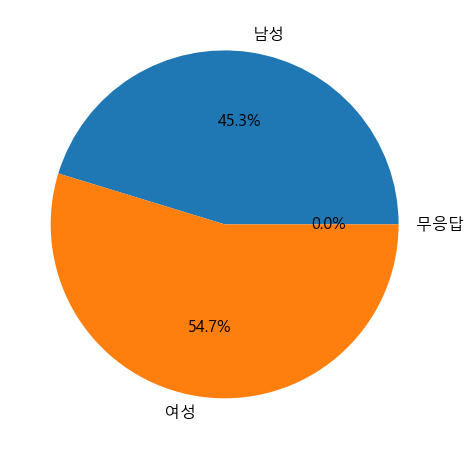

In [16]:
ratio =[man_count, woman_count, count]
labels = ['남성','여성','무응답']

plt.figure(figsize=[10,8])
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

### 성별에 따른 평균 월급 차이 분석

In [17]:
df1.isna().sum()

성별            0
태어난 년도        0
혼인상태          0
종교            0
직종         8291
월평균임금     10915
지역            0
dtype: int64

In [18]:
# 월평균임금 결측치 제거

man_salary = man.dropna(subset=['월평균임금'])
woman_salary = woman.dropna(subset=['월평균임금'])

In [29]:
# 성별 월급

man_salary_mean = round(man_salary['월평균임금'].mean(),2)
woman_salary_mean = round(woman_salary['월평균임금'].mean(),2)

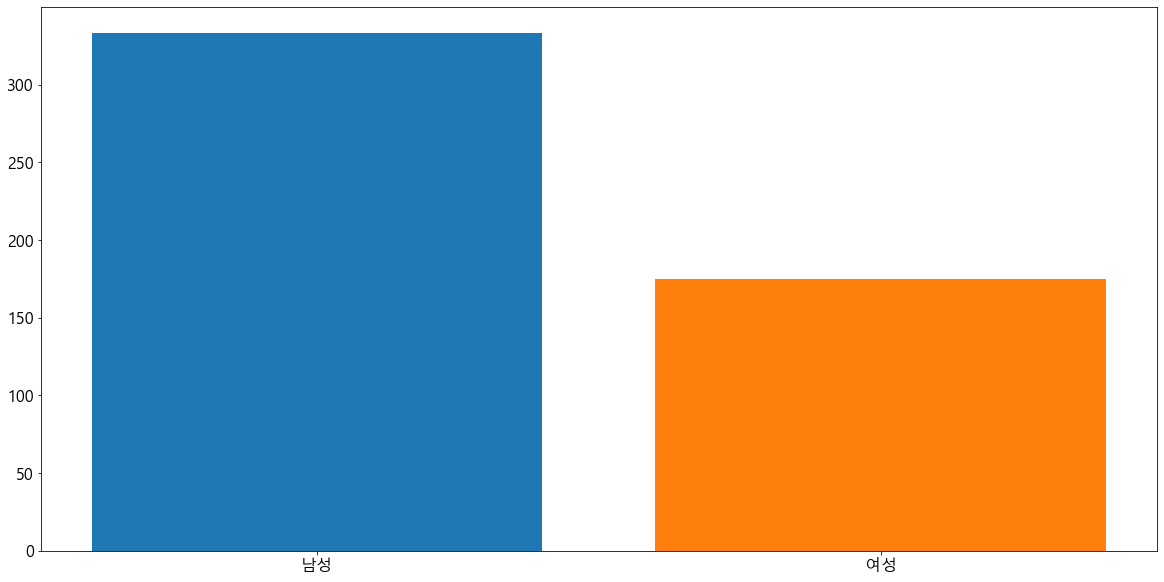

In [31]:
# 시각화

label = ['남성','여성']

plt.bar(label[0],man_salary_mean)
plt.bar(label[1],woman_salary_mean)

plt.show()

In [34]:
round(man_salary_mean - woman_salary_mean,2)

157.99

### 종교 유무에 따른 이혼비율

In [43]:
# 결측치 확인
df1['종교'].isna().sum()

0

In [44]:
df1['혼인상태'].isna().sum()

0

In [41]:
# 종교 유무 나누기
religion = df1[df1['종교']==1]
no_religion = df1[df1['종교']==2]

In [68]:
religion_ = religion['혼인상태'].count()
religion_3 = religion[religion['혼인상태']==3]['혼인상태'].count()

print(religion_)
print(religion_3)

7300
315


In [65]:
no_religion_ = no_religion['혼인상태'].count()
no_religion_3 = no_religion[no_religion['혼인상태']==3]['혼인상태'].count()
print(no_religion_)
print(no_religion_3)

8122
382


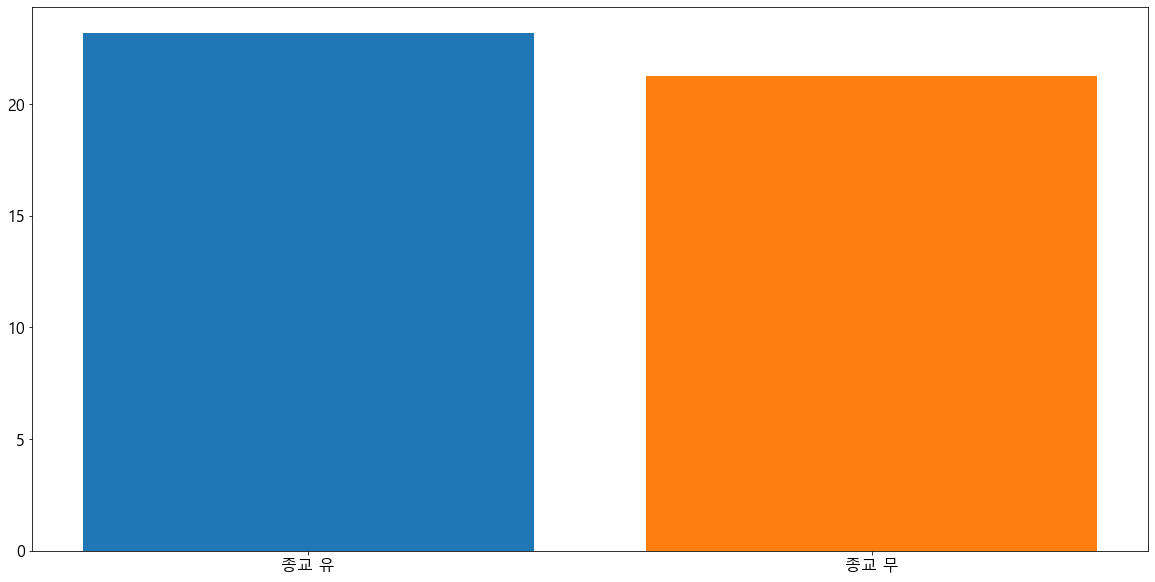

In [70]:
label = ['종교 유','종교 무']

plt.bar(label[0],religion_/religion_3)
plt.bar(label[1],no_religion_/no_religion_3)

plt.show()